<a href="https://colab.research.google.com/github/PavelStelmakhV/hw303-data-visualization/blob/main/Hw2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Вывести первые строки таблицы с помощью метода head

In [2]:
import pandas as pd
import numpy as np
import lxml
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
tmp = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України ', thousands=' ', decimal=',')
df = tmp[0]
print(df.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


2. Определите количество строк и столбцов в датафрейме (атрибут shape)

In [3]:
print(df.shape)

(28, 9)


3. Замените в таблице значения "—" на значения NaN

In [4]:
df.replace('—', np.nan, inplace=True)

4. Определите типы всех столбцов с помощью dataframe.dtypes

In [5]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

5. Замените типы не числовых колонок на числовые. Подсказка - это колонки где находился символ "—"

In [6]:
df['2014'] =  df['2014'].astype('float64')
df['2019'] =  df['2019'].astype('float64')

6. Посчитайте, какая доля пропусков содержится в каждой колонке (используйте методы isnull и sum)

In [7]:
shr_nan_2014 = round(df['2014'].isnull().sum() / 
                     (df['2014'].count() + df['2014'].isnull().sum()) * 100, 2)
print(f'Доля пропусков в колонке [2014] - {shr_nan_2014}%')
 
shr_nan_2019 = round(df['2019'].isnull().sum() / 
                     (df['2019'].count() + df['2019'].isnull().sum()) * 100, 2)
print(f'Доля пропусков в колонке [2019] - {shr_nan_2019}%') 

Доля пропусков в колонке [2014] - 7.14%
Доля пропусков в колонке [2019] - 14.29%


7. Удалите из таблицы данные по всей стране, последняя строчка таблицы

In [8]:
totalUkraine = df.iloc[27]
df.drop([27], axis=0, inplace=True)

8. Замените отсутствующие данные в столбцах средними значениями по этим столбцам (метод fillna)

In [9]:
df = df.fillna({'1950': df['1950'].mean(), 
                '1960': df['1960'].mean(), 
                '1970': df['1970'].mean(),
                '1990': df['1990'].mean(),
                '2000': df['2000'].mean(),
                '2012': df['2012'].mean(),
                '2014': df['2014'].mean(),
                '2019': df['2019'].mean()
                })

9. Получите список регионов, где уровень рождаемости в 2019 году был выше среднего по Украине

In [10]:
region_list = df.loc[df['2019'] > totalUkraine['2019']]['Регіон']
print(region_list)

2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


10. В каком регионе была самая высокая рождаемость в 2014 году?

In [11]:
df.loc[df['2014'] == df['2014'].max()]['Регіон']

16    Рівненська
Name: Регіон, dtype: object

11. Постройте столбцовую диаграмму рождаемости по регионам в 2019 году

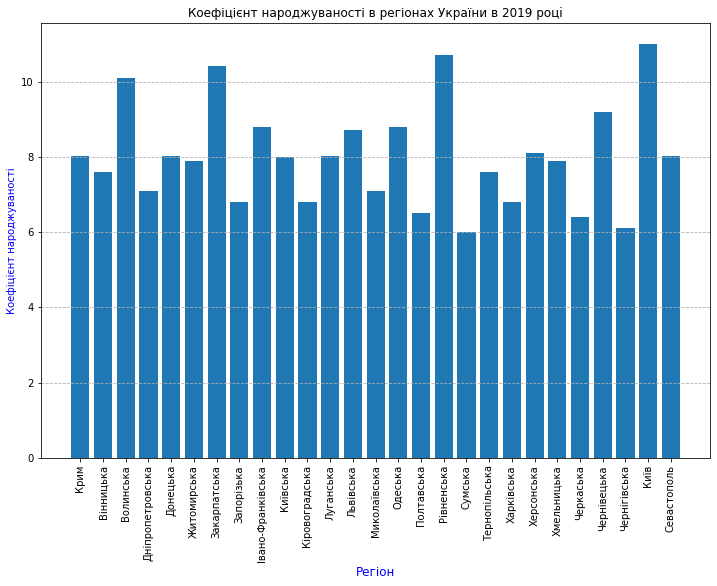

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.bar(df['Регіон'], df['2019'])
plt.title('Коефіцієнт народжуваності в регіонах України в 2019 роцi')
plt.xlabel('Регіон', color = 'blue', fontsize = 'large')
plt.ylabel('Коефіцієнт народжуваності', color = 'blue')
plt.xticks(rotation=90)
plt.grid(ls = '--', axis = 'y')
plt.show()

# Визуализация данных

In [32]:
new_df = df.sort_values(by='2019', ascending=False)
color_bar = ['red', 'darkred', 'maroon', 'firebrick', 'brown']
color_bar += ['royalblue'] * (len(new_df['Регіон']) - len(color_bar))
print(color_bar)

['red', 'darkred', 'maroon', 'firebrick', 'broun', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue', 'royalblue']


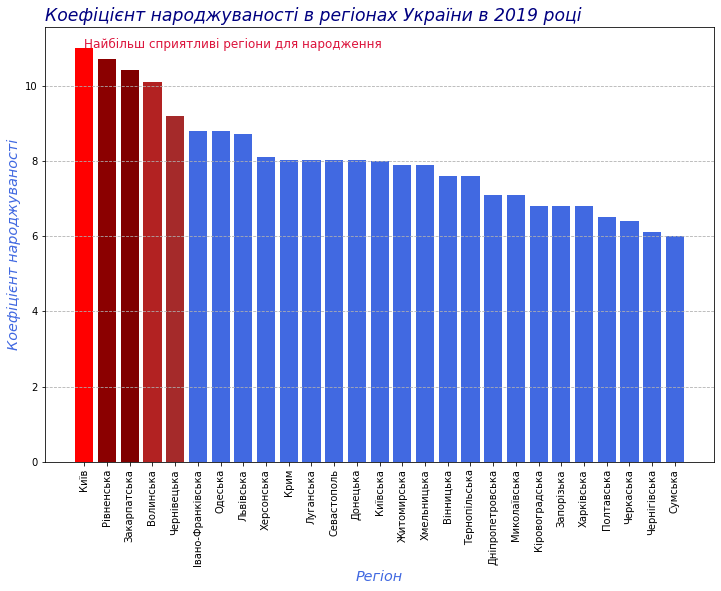

In [36]:
new_df = df.sort_values(by='2019', ascending=False)
color_bar = ['red', 'darkred', 'maroon', 'firebrick', 'brown']
color_bar += ['royalblue'] * (len(new_df['Регіон']) - len(color_bar))
plt.figure(figsize=(12, 8))
plt.bar(new_df['Регіон'], new_df['2019'], color=color_bar)
plt.title('Коефіцієнт народжуваності в регіонах України в 2019 роцi', color = 'navy',fontsize = 'xx-large', fontstyle ='oblique', loc='left')
plt.xlabel('Регіон', color = 'royalblue', fontsize = 'x-large', fontstyle ='italic')
plt.ylabel('Коефіцієнт народжуваності', color = 'royalblue', fontsize = 'x-large', fontstyle ='italic')
plt.xticks(rotation=90)
plt.grid(ls = '--', axis = 'y')
plt.text('Київ', 11, 'Найбiльш сприятливi регiони для народження', color="crimson", fontsize = 'large')
plt.show()

<Figure size 864x576 with 0 Axes>

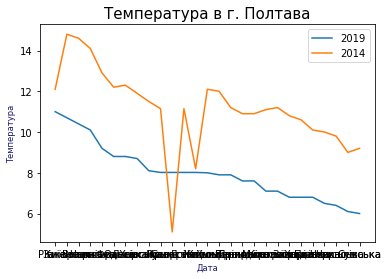

In [17]:
plt.figure(figsize=(12, 8))
fig, axs = plt.subplots()

axs.plot(new_df['Регіон'], new_df['2019'], label='2019')
axs.plot(new_df['Регіон'], new_df['2014'], label='2014')
plt.xlabel('Дата', fontsize='small', color='midnightblue')
plt.ylabel('Температура', fontsize='small', color='midnightblue')
plt.title('Температура в г. Полтава', fontsize=15)
# plt.text(date[0], 15, 'Осень достаточно теплая', color="blue")
plt.legend()
plt.show()

In [15]:
new_df


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
25,Київ,23.104,17.400000,15.9,12.0,7.3,12.0,12.100,11.000000
16,Рівненська,26.900,26.700000,19.3,15.8,11.8,15.9,14.800,10.700000
6,Закарпатська,31.400,27.300000,20.7,16.8,11.5,15.1,14.600,10.400000
2,Волинська,24.700,25.000000,17.9,15.3,11.2,14.8,14.100,10.100000
23,Чернівецька,24.700,21.800000,17.0,14.8,10.1,12.8,12.900,9.200000
8,Івано-Франківська,24.300,24.800000,18.2,15.5,10.3,12.4,12.200,8.800000
14,Одеська,24.100,19.200000,14.8,12.6,8.0,12.7,12.300,8.800000
12,Львівська,23.400,24.000000,17.1,14.0,9.1,11.9,11.900,8.700000
20,Херсонська,20.800,21.400000,16.6,14.3,8.5,11.7,11.500,8.100000
0,Крим,23.000,20.600000,16.0,13.0,7.3,12.6,11.144,8.017391


TypeError: ignored

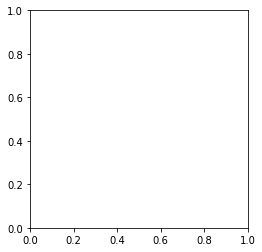

In [19]:
fig, ax = plt.subplots()
im = ax.imshow(new_df)

# Show all ticks and label them with the respective list entries
# ax.set_xticks(np.arange(len(farmers)), labels=farmers)
# ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# for i in range(len(vegetables)):
#     for j in range(len(farmers)):
#         text = ax.text(j, i, harvest[i, j],
#                        ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()